In [1]:
import numpy as np 

In [2]:
zou_x = np.array([50.12, 79.43, 125.89, 199.53, 316.23], dtype=np.float128)

zou_SED = np.array(
    [1.48251e-12, 2.32768e-13, 7.9658e-13, 2.2177e-13, 2.27837e-13], dtype=np.float128
)
zou_flux = np.array(
    [5.59982e-16, 3.50025e-17, 4.76875e-17, 5.28541e-18, 2.16172e-18], dtype=np.float128
)

zou_SED_err = np.array(
    [9.64129e-13, 2.05921e-13, 3.11731e-13, 1.44584e-13, 1.93536e-13], dtype=np.float128
)
zou_flux_err = np.array(
    [3.64175e-16, 3.09653e-17, 1.86619e-17, 3.44584e-18, 1.83627e-18], dtype=np.float128
)

print(zou_x.dtype)

float128


In [3]:
japan_x = np.array([29.4, 48.2, 76.4, 121, 194, 316], dtype=np.float128)

japan_SED = np.array(
    [2.71e-12, 7.8e-13, 4.62e-13, 6.64e-13, 4.15e-13, 4.56e-13], dtype=np.float128
)
japan_SED = japan_SED[:] / 1.6022  # TeV转换为erg
japan_flux = japan_SED / japan_x**2

japan_SED_errl = np.array(
    [0, 4.12e-13, 2.5e-13, 2.65e-13, 2.32e-13, 2.8e-13], dtype=np.float128
)
japan_SED_errl = japan_SED_errl[:] / 1.6022
japan_SED_errh = np.array(
    [0, 4.8e-13, 3.39e-13, 3.66e-13, 3.76e-13, 4.98e-13], dtype=np.float128
)
japan_SED_errh = japan_SED_errh[:] / 1.6022

japan_flux_errl = japan_SED_errl / japan_x**2
japan_flux_errh = japan_SED_errh / japan_x**2

print(japan_SED)

[1.69142429e-12 4.86830608e-13 2.88353514e-13 4.14430159e-13
 2.59018849e-13 2.84608663e-13]


In [4]:
hess_x = np.array([0.418, 0.948, 2.27, 5.38, 12.8, 30.0], dtype=np.float128)

hess_SED = np.array(
    [3.9e-13, 1.1e-12, 8.07e-13, 9.8e-13, 1.36e-12, 5.44e-13], dtype=np.float128
)
hess_SED = hess_SED / 1.6022
hess_flux = hess_SED / hess_x**2

hess_SED_errl = np.array(
    [3.139e-13, 2.22e-13, 2.27e-13, 2.66e-13, 3.74e-13, 3.46e-13], dtype=np.float128
)
hess_SED_errl = hess_SED_errl / 1.6022
hess_SED_errh = np.array(
    [3.28e-13, 2.2e-13, 2.23e-13, 2.8e-13, 4.3e-13, 4.17e-13], dtype=np.float128
)
hess_SED_errh = hess_SED_errh / 1.6022

hess_flux_errl = hess_SED_errl / hess_x**2
hess_flux_errh = hess_SED_errh / hess_x**2

In [5]:
lhaaso_x = np.array([99.7], dtype=np.float128)

lhaaso_SED = np.array([7.18e-13], dtype=np.float128)
lhaaso_SED = lhaaso_SED / 1.6022
lhaaso_flux = lhaaso_SED / lhaaso_x**2

lhaaso_SED_err = np.array([1.47e-13], dtype=np.float128)
lhaaso_SED_err = lhaaso_SED_err / 1.6022
lhaaso_flux_err = lhaaso_SED_err / lhaaso_x**2

In [6]:
fermi_x = np.array([1.67e-2, 5.25e-2, 0.167], dtype=np.float128)

fermi_SED = np.array([3.53e-12, 3.58e-12, 1.17e-11], dtype=np.float128)
fermi_SED = fermi_SED / 1.6022
fermi_flux = fermi_SED / fermi_x**2

fermi_flux_errl = np.zeros(3)
fermi_flux_errh = np.zeros(3)

# print(fermi_x[1:])

In [7]:
fermi_SED

array([2.20322057e-12, 2.23442766e-12, 7.30245912e-12], dtype=float128)

<Figure size 1600x1200 with 0 Axes>

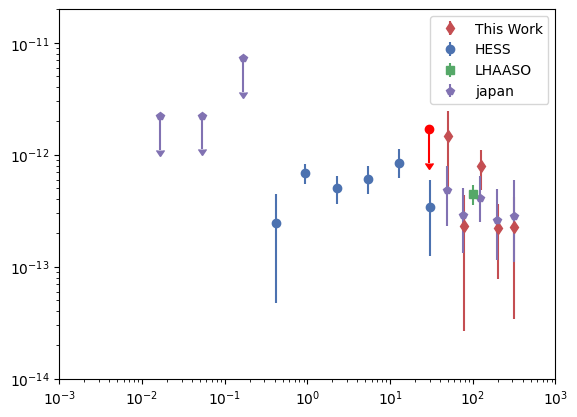

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
fig, ax = plt.subplots()

zou_point = ax.errorbar(
    zou_x,
    zou_SED,
    yerr=zou_SED_err,
    fmt="d",
    c=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
)

# japan 非uplimit
japan_point = ax.errorbar(
    japan_x[1:],
    japan_SED[1:],
    yerr=[(japan_SED_errl[1:]), (japan_SED_errh[1:])],
    fmt="p",
    c=(0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
)

# japan uplimit
delta_y = japan_SED[0] / 2
japan_point_up = ax.errorbar(
    japan_x[0], japan_SED[0], yerr=delta_y, fmt="o", c="r", uplims=True
)

hess_point = ax.errorbar(
    hess_x,
    hess_SED,
    yerr=[(hess_SED_errl), (hess_SED_errh)],
    fmt="o",
    c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
)

lhaaso_point = ax.errorbar(
    lhaaso_x,
    lhaaso_SED,
    yerr=lhaaso_SED_err,
    fmt="s",
    c=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
)

delta_y_fermi = fermi_SED / 2
fermi_point = ax.errorbar(
    fermi_x,
    fermi_SED,
    yerr=delta_y_fermi,
    fmt="p",
    c=(0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
    uplims=True,
)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(1e-3, 1e3)
ax.set_ylim(1e-14, 2e-11)

legend = ax.legend(
    (zou_point, hess_point, lhaaso_point, japan_point),
    ("This Work", "HESS", "LHAASO", "japan"),
)

plt.show()

In [8]:
from threeML import * # 用作拟合，这个似乎依赖ROOT，这个不仅可以做这样的一维拟合，也可以进行如扩散之类的拟合。
import astropy.units as u # 引入单位

00:12:22 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=789199;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=535147;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=756309;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=976304;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=920101;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=205747;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=936145;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=875077;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=521921;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=55346;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=407027;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=757646;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=298427;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=309757;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=804448;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=815126;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

00:12:22 INFO      Starting 3ML!                                                                     ]8;id=213873;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=311599;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=524315;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=442552;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=252020;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=229468;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=18983;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=4487;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=595262;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=415937;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#46\46]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=739585;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=749181;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=99108;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=81721;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

00:12:23 WARNING   PyGMO is not available                                                      ]8;id=854520;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=472055;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

00:12:23 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=49188;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=254715;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=689662;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=197158;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=195161;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=933744;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=2845;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=387332;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=994755;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=505103;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=687837;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=786394;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=446790;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=452596;file:///home2/hky/miniconda3/envs/naima/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

In [9]:
# 引入电子档cutoffpowlaw 与 IC相互作用
from naima.models import InverseCompton, PowerLaw
# naima使用的是马尔科夫蒙特卡洛算法（MCMC）
import naima

In [10]:
# 首先要对拟合的模型进行定义
# 此处模型定义应该有2个参数，第一个是需要拟合的参数，第二个是传入的数据
def model_function_IC(pars, data):
    # 传入的pars的第一位作为电子谱的强度，第二位作为电子谱的谱指数
    amplitude = pars[0] / u.eV
    alpha = pars[1]

    PL = PowerLaw(amplitude, 10 * u.TeV, alpha)

    # 这里考虑了3种光子微波背景辐射，远红外背景，近红外背景
    IC = InverseCompton(PL, seed_photon_fields=["CMB", "FIR", "NIR"])

    return IC.flux(data, distance=7 * u.kpc)

In [11]:
# 引入约束条件
from naima import uniform_prior

# 定义约束条件
def lnprior_IC(pars):
    # 这里是相对于对每一个参数进行限制
    lnprior = uniform_prior(pars[0], 0.0, np.inf) + uniform_prior(pars[1], 1, 5)
    return lnprior

In [12]:
# 定义初始条件
p0 = np.array((1e32, 2.0))

# 定义每个变量的含义
labels = ["norm", "index"]

In [13]:
# naima拟合要求数据使用astropy的table格式
from astropy.table import Table

meta = {"keywords": {"cl": {"value": 0.99}}}

zou_isuplimit = np.zeros(len(zou_x), dtype=int)
japan_isuplimit = np.zeros(len(japan_x), dtype=int)
japan_isuplimit[0] = 1
hess_isuplimit = np.zeros(len(hess_x), dtype=int)
lhaaso_isuplimit = np.zeros(len(lhaaso_x), dtype=int)
fermi_isuplimit = np.ones(len(fermi_x), dtype=int)

hess_dat = Table(
    [
        hess_x * u.TeV,
        hess_flux / u.TeV / u.s / u.cm / u.cm,
        hess_flux_errl / u.TeV / u.s / u.cm / u.cm,
        hess_flux_errh / u.TeV / u.s / u.cm / u.cm,
        hess_isuplimit,
    ],
    names=("energy", "flux", "flux_error_lo", "flux_error_hi", "ul"),
    meta=meta,
)
lhaaso_dat = Table(
    [
        lhaaso_x * u.TeV,
        lhaaso_flux / u.TeV / u.s / u.cm / u.cm,
        lhaaso_flux_err / u.TeV / u.s / u.cm / u.cm,
        lhaaso_flux_err / u.TeV / u.s / u.cm / u.cm,
        lhaaso_isuplimit,
    ],
    names=("energy", "flux", "flux_error_lo", "flux_error_hi", "ul"),
    meta=meta,
)
fermi_dat = Table(
    [
        fermi_x * u.TeV,
        fermi_flux / u.TeV / u.s / u.cm / u.cm,
        fermi_flux_errl / u.TeV / u.s / u.cm / u.cm,
        fermi_flux_errh / u.TeV / u.s / u.cm / u.cm,
        fermi_isuplimit,
    ],
    names=("energy", "flux", "flux_error_lo", "flux_error_hi", "ul"),
    meta=meta,
)
zou_dat = Table(
    [
        zou_x * u.TeV,
        zou_flux / u.TeV / u.s / u.cm / u.cm,
        zou_flux_err / u.TeV / u.s / u.cm / u.cm,
        zou_flux_err / u.TeV / u.s / u.cm / u.cm,
        zou_isuplimit,
    ],
    names=("energy", "flux", "flux_error_lo", "flux_error_hi", "ul"),
    meta=meta,
)
japan_dat = Table(
    [
        japan_x * u.TeV,
        japan_flux / u.TeV / u.s / u.cm / u.cm,
        japan_flux_errl / u.TeV / u.s / u.cm / u.cm,
        japan_flux_errh / u.TeV / u.s / u.cm / u.cm,
        japan_isuplimit,
    ],
    names=("energy", "flux", "flux_error_lo", "flux_error_hi", "ul"),
    meta=meta,
)

In [14]:
# 进行拟合（实际上是通过MCMC计算出最适合的电子谱）
sampler, pos = naima.run_sampler(
    # data_table=[hess_dat, lhaaso_dat, fermi_dat, zou_dat, japan_dat],  # 使用的数据
    data_table=[fermi_dat,hess_dat, lhaaso_dat, zou_dat, ],
    p0=p0,  # 初始条件，这个条件应该尽可能的靠近真实的条件
    labels=labels,  # 每个参量的名字
    model=model_function_IC,  # 拟合的模型（这个是上面我们定义的那个）
    prior=lnprior_IC,  # 模型的约束条件
    nwalkers=12,  # MCMC算法中的参数，下同（我没看懂）这里虽然写出来了
    nburn=100,  # 但是使用的其实是默认参数
    nrun=500,
    threads=12,  # 使用的cpu数
)

Burning in the 12 walkers with 100 steps...

Progress of the run: 0 percent (0 of 100 steps)
                           -----norm------ -----index-----
  Last ensemble median :    2.33e+32          2.04      
  Last ensemble std    :    2.81e+31          0.136     
  Last ensemble lnprob :  avg: -984.504, max: -33.627

Progress of the run: 5 percent (5 of 100 steps)
                           -----norm------ -----index-----
  Last ensemble median :    2.09e+32          2.18      
  Last ensemble std    :    6.02e+31          0.222     
  Last ensemble lnprob :  avg: -559.129, max: -5.735

Progress of the run: 10 percent (10 of 100 steps)
                           -----norm------ -----index-----
  Last ensemble median :     1.9e+32          2.22      
  Last ensemble std    :    7.01e+31          0.229     
  Last ensemble lnprob :  avg: -202.915, max: -4.777

Progress of the run: 15 percent (15 of 100 steps)
                           -----norm------ -----index-----
  Last ensemble me

In [15]:
# 对上面计算的一些图保存
naima.save_diagnostic_plots(
    "./naima/tutorial_IC",
    sampler,
    blob_labels=[
        "Spectrum",
        "Electron energy distribution",
        "$W_e (E_e>1$ TeV)",
    ],
)

INFO: Plotting chain of parameter norm... [naima.analysis]
INFO: -----------------------norm-----------------------
          norm = $(1.30 \pm 0.19)\times10^{32}$ [naima.plot]
INFO: Plotting chain of parameter index... [naima.analysis]
INFO: ----------------------index-----------------------
          index = $2.48 \pm 0.07$ [naima.plot]
INFO: Plotting corner plot... [naima.analysis]
INFO: Plotting Spectrum... [naima.analysis]
INFO: Plotting Electron energy distribution... [naima.analysis]



WARNING UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.



In [16]:
# 对MC的拟合结果保存（我不知道为什么这里的参数和图上会有一点点不同
result_leptonic = naima.save_results_table("./naima/tutorial_IC_fit", sampler)


INFO: Saving results table in ./naima/tutorial_IC_fit_results.ecsv [naima.analysis]


In [17]:
result_leptonic

label,median,unc_lo,unc_hi
bytes72,float64,float64,float64
norm,1.3014268079396722e+32,1.8507024361505416e+31,1.9851432788862706e+31
index,2.4843788748508935,0.0751699820499625,0.0731195097523667
blob1,nan,nan,nan


In [22]:
# 画出拟合能谱（我这里不会加图例）
figure_fit = naima.plot_fit(sampler,
                            sed=True,
                            e_unit=u.eV,
                            e_range=[1e9*u.eV,4e14*u.eV],
                            last_step=False,
                            ML_info=False,
                            plotresiduals=True,
                            confs=[1,2],                   # 是否画出置信区间
                            plotdata=True,
                            label="Leptonic",
                           )
plt.savefig("./naima/tutorial_IC_fit.png")

In [23]:
# 接下来看一下强子起源的情况
from naima.models import PionDecay
from naima.models import ExponentialCutoffPowerLaw

In [84]:
# # 接下来看一下强子起源的情况
# from naima.models import PionDecay
# from naima.models import ExponentialCutoffPowerLaw


# naima使用的应该是用一个能谱的质子与静止的质子相互作用尝试pi0,之后衰变为光子（我不确定
def PionDecay_ECPL(pars, data):
    amplitude = 10 ** pars[0] / u.eV
    alpha = pars[1]
    e_cutoff = 10 ** pars[2] * u.TeV

    # 假设质子的能谱满足cutoff的powerlaw
    ECPL = naima.models.ExponentialCutoffPowerLaw(
         amplitude, 10 * u.TeV, alpha, e_cutoff
    )

    # 此处nh为静止质子的密度, 论文里好像说是10？
    PP = naima.models.PionDecay(ECPL, nh=10.0 * u.cm**-3)

    return PP.flux(data, distance=7.0 * u.kpc)


In [110]:
# 新的初始条件
p2 = np.array((33, 2, 3))
# p2 = np.array((1e33, 2.0, 4.0))

labels2 = ["log10(norm)", "index", "log10(cutoff)"]


# 重新定义约束条件
def lnprior_PP(pars):
    # 这里是相对于对每一个参数进行限制
    lnprior = (
        uniform_prior(pars[0], 30, np.inf)
        + uniform_prior(pars[1], 1, 5)  ##############
        + uniform_prior(pars[2], 1, 5)
    )
    return lnprior


In [111]:
# 进行拟合
sampler_3, pos_3 = naima.run_sampler(
    # data_table=[fermi_dat, hess_dat, japan_dat, lhaaso_dat],
    data_table=[fermi_dat, hess_dat, zou_dat],  # , lhaaso_dat,
    p0=p2,  # 初始条件，这个条件应该尽可能的靠近真实的条件
    labels=labels2,  # 每个参量的名字
    model=PionDecay_ECPL,  # 拟合的模型（这个是上面我们定义的那个）
    prior=lnprior_PP,  # 模型的约束条件
    nwalkers=32,  # MCMC算法中的参数
    nburn=100,  # 但是使用的其实是默认参数
    nrun=500,
    # threads=32,  # 使用的cpu数
)


Burning in the 32 walkers with 100 steps...

Progress of the run: 0 percent (0 of 100 steps)
                           --log10(norm)-- -----index----- -log10(cutoff)-
  Last ensemble median :      48.4            1.92            2.99      
  Last ensemble std    :      5.34            0.237           0.312     
  Last ensemble lnprob :  avg: -143873968950566272986343985975079587151091859456000.000, max: -2394.324

Progress of the run: 5 percent (5 of 100 steps)
                           --log10(norm)-- -----index----- -log10(cutoff)-
  Last ensemble median :       43             2.02            3.01      
  Last ensemble std    :      6.35            0.413           0.529     
  Last ensemble lnprob :  avg: -3555588042284469564157091033395377471488.000, max: -30.276

Progress of the run: 10 percent (10 of 100 steps)
                           --log10(norm)-- -----index----- -log10(cutoff)-
  Last ensemble median :      38.4            1.98            3.02      
  Last ensemble std   

In [114]:
# 画出拟合能谱
figure_fit = naima.plot_fit(sampler_3,
                            sed=True,
                            e_unit=u.eV,
                            e_range=[1e9*u.eV,4e14*u.eV],
                            last_step=False,
                            # ML_info=True,
                            plotresiduals=True,
                            confs=[1,2],                   # 是否画出置信区间
                            plotdata=True,
                            label="Hadronic"
                           )
plt.savefig("/home2/hky/github/Gamma_Energy/J1849/naima/tutorial_PP_fit.png")

In [113]:
# 对上面计算的一些图保存
naima.save_diagnostic_plots(
    "./naima/tutorial_PP",
    sampler_3,
    blob_labels=[
        "Spectrum",
        "Electron energy distribution",
        "$W_e (E_e>1$ TeV)",
    ],
)

INFO:astropy:Plotting chain of parameter log10(norm)...
INFO:astropy:-------------------log10(norm)--------------------
          log10(norm) = $33.91^{+0.10}_{-0.13}$
                 norm = $(8 \pm 2)\times10^{33}$


INFO: Plotting chain of parameter log10(norm)... [naima.analysis]
INFO: -------------------log10(norm)--------------------
          log10(norm) = $33.91^{+0.10}_{-0.13}$
                 norm = $(8 \pm 2)\times10^{33}$ [naima.plot]


INFO:astropy:Plotting chain of parameter index...
INFO:astropy:----------------------index-----------------------
          index = $1.91^{+0.17}_{-0.3}$


INFO: Plotting chain of parameter index... [naima.analysis]
INFO: ----------------------index-----------------------
          index = $1.91^{+0.17}_{-0.3}$ [naima.plot]


INFO:astropy:Plotting chain of parameter log10(cutoff)...
INFO:astropy:------------------log10(cutoff)-------------------
          log10(cutoff) = $3.2^{+0.7}_{-0.5}$
                 cutoff = $(1.6^{+7}_{-1.1})\times10^{3}$


INFO: Plotting chain of parameter log10(cutoff)... [naima.analysis]
INFO: ------------------log10(cutoff)-------------------
          log10(cutoff) = $3.2^{+0.7}_{-0.5}$
                 cutoff = $(1.6^{+7}_{-1.1})\times10^{3}$ [naima.plot]


INFO:astropy:Plotting corner plot...


INFO: Plotting corner plot... [naima.analysis]


INFO:astropy:Plotting Spectrum...


INFO: Plotting Spectrum... [naima.analysis]



WARNING UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.

INFO:astropy:Plotting Electron energy distribution...


INFO: Plotting Electron energy distribution... [naima.analysis]


In [ ]:
result_hadronic

label,median,unc_lo,unc_hi
bytes72,float64,float64,float64
log10(norm),3.8991029906495243,0.13141834786562745,0.09739757950777106
norm,7926.892902839143,2069.7658778502773,1992.853513940834
index,1.9010655372735665,0.214167445975308,0.14887826155811812
log10(cutoff),3.2554957836683465,0.3957816394055027,0.6599749863280757
cutoff,1800.9256501380664,1076.9663621066386,6430.418693336145
blob1,nan,nan,nan
